<a href="https://colab.research.google.com/github/Ahmad7862002/BigMart-Outlet-Sales-Analysis-and-Predictions/blob/main/BigMart_Technocolabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import pickle

In [108]:
# Load the training data from train.csv
train = pd.read_csv('Train.csv')

# Load the test data from test.csv
test = pd.read_csv('Test.csv')

In [109]:
train.shape

(8523, 12)

In [110]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [112]:
train.isnull().sum()
#problem with item weight and outlet size

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [113]:
weightmed = train["Item_Weight"].median()
train["Item_Weight"].replace(np.nan, weightmed,inplace = True)

In [114]:
sizemod = train["Outlet_Size"].mode().values[0]
train["Outlet_Size"].replace(np.nan, sizemod,inplace = True)

In [115]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [116]:
train.drop_duplicates(inplace = True)

<Axes: >

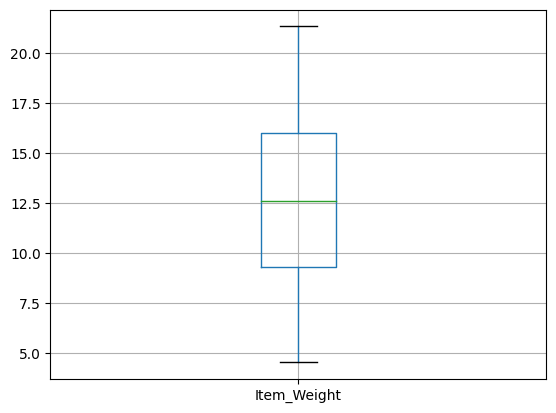

In [117]:
train.boxplot(column  =["Item_Weight"])

<Axes: >

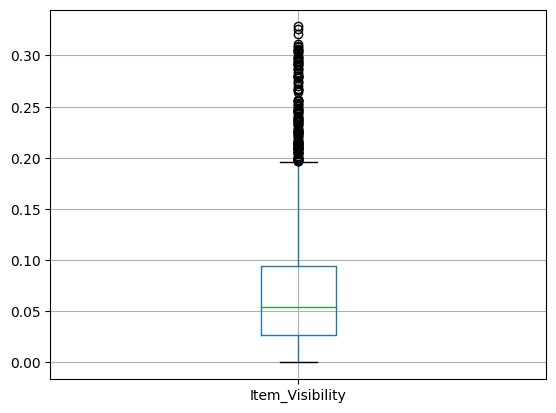

In [118]:
train.boxplot(column  =["Item_Visibility"])

In [119]:
# Calculate the quartiles and IQR
Q1 = train["Item_Visibility"].quantile(0.25)
Q3 = train["Item_Visibility"].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = len(train[(train["Item_Visibility"] < lower_bound) | (train["Item_Visibility"] > upper_bound)])
outliers_count

144

In [53]:
#train["Item_Visibility"] = np.where(train["Item_Visibility"] >= upper_bound,upper_bound,train["Item_Visibility"])
#train["Item_Visibility"] = np.where(train["Item_Visibility"] <= lower_bound,lower_bound,train["Item_Visibility"])

In [120]:
train.loc[train["Item_Visibility"] < lower_bound, "Item_Visibility"] = lower_bound
train.loc[train["Item_Visibility"] > upper_bound, "Item_Visibility"] = upper_bound

<Axes: >

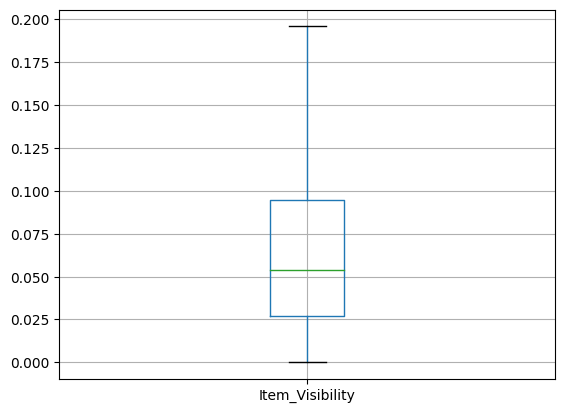

In [121]:
train.boxplot(column  =["Item_Visibility"])

In [122]:
scale = StandardScaler()

In [123]:
num_unique_values = train["Item_Identifier"].nunique()
num_unique_values

1559

In [124]:
num_unique_values = train["Item_Fat_Content"].nunique()
num_unique_values

5

In [125]:
label_encoder = LabelEncoder()

train["Outlet_Identifier"] = label_encoder.fit_transform(train["Outlet_Identifier"])
train["Item_Identifier"] = label_encoder.fit_transform(train["Item_Identifier"])
train["Outlet_Type"] = label_encoder.fit_transform(train["Outlet_Type"])
train["Item_Type"] = label_encoder.fit_transform(train["Item_Type"])

In [126]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,Low Fat,0.016047,4,249.8092,9,1999,Medium,Tier 1,1,3735.1380
1,8,5.92,Regular,0.019278,14,48.2692,3,2009,Medium,Tier 3,2,443.4228
2,662,17.50,Low Fat,0.016760,10,141.6180,9,1999,Medium,Tier 1,1,2097.2700
3,1121,19.20,Regular,0.000000,6,182.0950,0,1998,Medium,Tier 3,0,732.3800
4,1297,8.93,Low Fat,0.000000,9,53.8614,1,1987,High,Tier 3,1,994.7052


In [65]:
#onehot_encoder = OneHotEncoder(sparse=False)

#onehot_encoded = onehot_encoder.fit_transform(train["Item_Fat_Content"].values.reshape(-1, 1))

#onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(["Item_Fat_Content"]))

#train = pd.concat([train, onehot_df], axis=1)

#train.drop("Item_Fat_Content", axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [127]:
train.tail(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8503,806,20.500,Low Fat,0.036133,6,120.1756,6,2004,Small,Tier 2,1,3392.9168
8504,1410,12.600,Low Fat,0.124111,9,111.7544,5,1985,Medium,Tier 3,3,4138.6128
8505,224,10.500,Regular,0.094146,13,210.8244,3,2009,Medium,Tier 3,2,2117.2440
8506,45,17.250,Low Fat,0.084676,14,263.1910,3,2009,Medium,Tier 3,2,3944.8650
8507,671,5.880,Regular,0.030242,5,101.7990,6,2004,Small,Tier 2,1,515.9950
8508,1091,11.350,Regular,0.043246,6,199.4742,7,2002,Medium,Tier 2,1,2587.9646
8509,420,8.100,Low Fat,0.195979,6,213.9902,0,1998,Medium,Tier 3,0,424.7804
8510,689,13.800,Regular,0.056862,13,231.5984,6,2004,Small,Tier 2,1,7182.6504
8511,359,17.500,Low Fat,0.026980,5,262.5910,3,2009,Medium,Tier 3,2,4207.8560
8512,841,20.700,Low Fat,0.042801,4,178.3028,1,1987,High,Tier 3,1,2479.4392


In [128]:
unique_values = train["Item_Fat_Content"].unique()
unique_values

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [129]:
# Define the word replacements
word_replacements = {
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
}

# Replace the words in the column
train["Item_Fat_Content"] = train["Item_Fat_Content"].replace(word_replacements, regex=True)

In [130]:
unique_values = train["Item_Fat_Content"].unique()
unique_values

array(['Low Fat', 'Regular'], dtype=object)

In [131]:
onehot_encoder = OneHotEncoder(sparse=False)

onehot_encoded = onehot_encoder.fit_transform(train["Item_Fat_Content"].values.reshape(-1, 1))

onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(["Item_Fat_Content"]))

train = pd.concat([train, onehot_df], axis=1)

train.drop("Item_Fat_Content", axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [132]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,156,9.30,0.016047,4,249.8092,9,1999,Medium,Tier 1,1,3735.1380,1.0,0.0
1,8,5.92,0.019278,14,48.2692,3,2009,Medium,Tier 3,2,443.4228,0.0,1.0
2,662,17.50,0.016760,10,141.6180,9,1999,Medium,Tier 1,1,2097.2700,1.0,0.0
3,1121,19.20,0.000000,6,182.0950,0,1998,Medium,Tier 3,0,732.3800,0.0,1.0
4,1297,8.93,0.000000,9,53.8614,1,1987,High,Tier 3,1,994.7052,1.0,0.0


In [133]:
unique_values = train["Outlet_Size"].unique()
unique_values

array(['Medium', 'High', 'Small'], dtype=object)

In [134]:
unique_values = train["Outlet_Location_Type"].unique()
unique_values

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [135]:
unique_values = train["Outlet_Type"].unique()
unique_values

array([1, 2, 0, 3])

In [136]:
onehot_encoder = OneHotEncoder(sparse=False)


onehot_encoded = onehot_encoder.fit_transform(train["Outlet_Size"].values.reshape(-1, 1))

onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(["Outlet_Size"]))


train = pd.concat([train, onehot_df], axis=1)

train.drop("Outlet_Size", axis=1, inplace=True)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [137]:
onehot_encoder = OneHotEncoder(sparse=False)

onehot_encoded = onehot_encoder.fit_transform(train["Outlet_Location_Type"].values.reshape(-1, 1))

onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(["Outlet_Location_Type"]))

train = pd.concat([train, onehot_df], axis=1)

train.drop("Outlet_Location_Type", axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [138]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,156,9.30,0.016047,4,249.8092,9,1999,1,3735.1380,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,8,5.92,0.019278,14,48.2692,3,2009,2,443.4228,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,662,17.50,0.016760,10,141.6180,9,1999,1,2097.2700,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1121,19.20,0.000000,6,182.0950,0,1998,0,732.3800,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1297,8.93,0.000000,9,53.8614,1,1987,1,994.7052,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [139]:
train.corr()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
Item_Identifier,1.000000,0.044218,-0.026757,-0.017973,0.012853,-0.008602,-0.012772,-0.001178,0.002869,0.114660,-0.114660,0.000088,-0.001822,0.001918,0.004215,-0.014406,0.009959
Item_Weight,0.044218,1.000000,-0.013744,0.028038,0.024951,-0.007666,0.007739,-0.009973,0.009693,0.021092,-0.021092,0.015976,-0.007479,-0.002981,0.002083,-0.007382,0.005174
Item_Visibility,-0.026757,-0.013744,1.000000,-0.036213,-0.001163,-0.091872,-0.064105,-0.157779,-0.117918,-0.049342,0.049342,-0.038385,-0.026731,0.055700,0.053422,-0.060900,0.009362
Item_Type,-0.017973,0.028038,-0.036213,1.000000,0.032651,0.001656,0.004970,0.003053,0.017048,0.139434,-0.139434,-0.003507,0.006777,-0.004922,-0.006536,0.007172,-0.000878
Item_MRP,0.012853,0.024951,-0.001163,0.032651,1.000000,0.003319,0.005020,-0.001975,0.567574,-0.006063,0.006063,0.002438,-0.010578,0.009793,-0.001229,0.001951,-0.000744
Outlet_Identifier,-0.008602,-0.007666,-0.091872,0.001656,0.003319,1.000000,0.079035,0.099873,0.162325,-0.000764,0.000764,-0.459730,-0.032738,0.355023,0.611954,0.069080,-0.629001
Outlet_Establishment_Year,-0.012772,0.007739,-0.064105,0.004970,0.005020,0.079035,1.000000,-0.122304,-0.049135,-0.003151,0.003151,-0.453388,0.342251,-0.056567,-0.201690,0.540820,-0.333895
Outlet_Type,-0.001178,-0.009973,-0.157779,0.003053,-0.001975,0.099873,-0.122304,1.000000,0.401522,-0.002199,0.002199,-0.088530,0.361340,-0.330841,-0.330841,-0.176022,0.473224
Item_Outlet_Sales,0.002869,0.009693,-0.117918,0.017048,0.567574,0.162325,-0.049135,0.401522,1.000000,-0.018719,0.018719,0.024170,0.075154,-0.098403,-0.111287,0.058261,0.046376
Item_Fat_Content_Low Fat,0.114660,0.021092,-0.049342,0.139434,-0.006063,-0.000764,-0.003151,-0.002199,-0.018719,1.000000,-1.000000,0.002132,-0.003495,0.002313,-0.003155,0.003272,-0.000241


In [140]:
train["Item_MRP"] = scale.fit_transform(train["Item_MRP"].values.reshape(-1, 1))

In [141]:
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,156,9.30,0.016047,4,1.747454,9,1999,1,3735.1380,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,8,5.92,0.019278,14,-1.489023,3,2009,2,443.4228,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,662,17.50,0.016760,10,0.010040,9,1999,1,2097.2700,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1121,19.20,0.000000,6,0.660050,0,1998,0,732.3800,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1297,8.93,0.000000,9,-1.399220,1,1987,1,994.7052,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [142]:
train.drop(["Item_Type","Item_Identifier"	,"Item_Weight"], axis=1, inplace=True)

In [143]:
train.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,0.016047,1.747454,9,1999,1,3735.1380,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.019278,-1.489023,3,2009,2,443.4228,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.016760,0.010040,9,1999,1,2097.2700,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.000000,0.660050,0,1998,0,732.3800,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.000000,-1.399220,1,1987,1,994.7052,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [144]:
features = train.drop('Item_Outlet_Sales', axis=1)
target = train['Item_Outlet_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1,random_state = 60)


In [145]:
linear_reg = LinearRegression()

rf_reg = RandomForestRegressor()

xgb_reg = xgb.XGBRegressor()

In [146]:
linear_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)


linear_reg_predictions = linear_reg.predict(X_test)
rf_reg_predictions = rf_reg.predict(X_test)
xgb_reg_predictions = xgb_reg.predict(X_test)



linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
rf_reg_mse = mean_squared_error(y_test, rf_reg_predictions)
xgb_reg_mse = mean_squared_error(y_test, xgb_reg_predictions)


print("Linear Regression MSE:", linear_reg_mse)
print("Random Forest Regression MSE:", rf_reg_mse)
print("XGBoost Regression MSE:", xgb_reg_mse)

Linear Regression MSE: 1222648.5096460131
Random Forest Regression MSE: 1141888.2883779604
XGBoost Regression MSE: 1201511.9702718812


In [147]:
# Calculate R-squared for each model
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)
rf_reg_r2 = r2_score(y_test, rf_reg_predictions)
xgb_reg_r2 = r2_score(y_test, xgb_reg_predictions)

# Calculate percentage accuracy
linear_reg_accuracy = linear_reg_r2 * 100
rf_reg_accuracy = rf_reg_r2 * 100
xgb_reg_accuracy = xgb_reg_r2 * 100

# Print the percentage accuracy
print("Linear Regression Accuracy:",linear_reg_accuracy)
print("Random Forest Regression Accuracy:",rf_reg_accuracy)
print("XGBoost Regression Accuracy:",xgb_reg_accuracy)

Linear Regression Accuracy: 57.70737044889227
Random Forest Regression Accuracy: 60.500946929465684
XGBoost Regression Accuracy: 58.43850439514914


In [149]:
# Save the model to a file
filename = 'random_forest_model.sav'
pickle.dump(rf_reg, open(filename, 'wb'))